c:\Users\91824\Documents\Codes\deep-learning\udlbook\Notebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


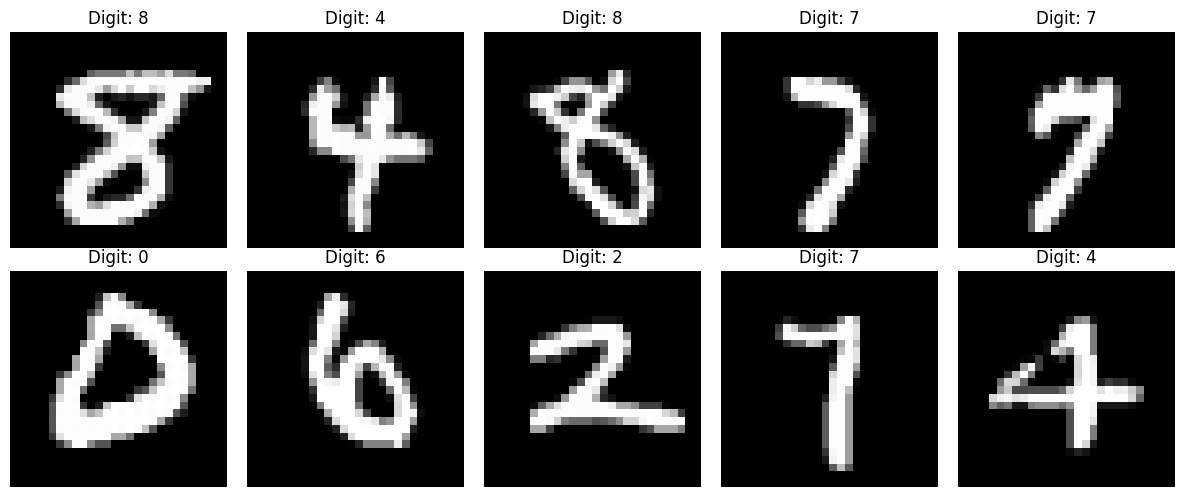

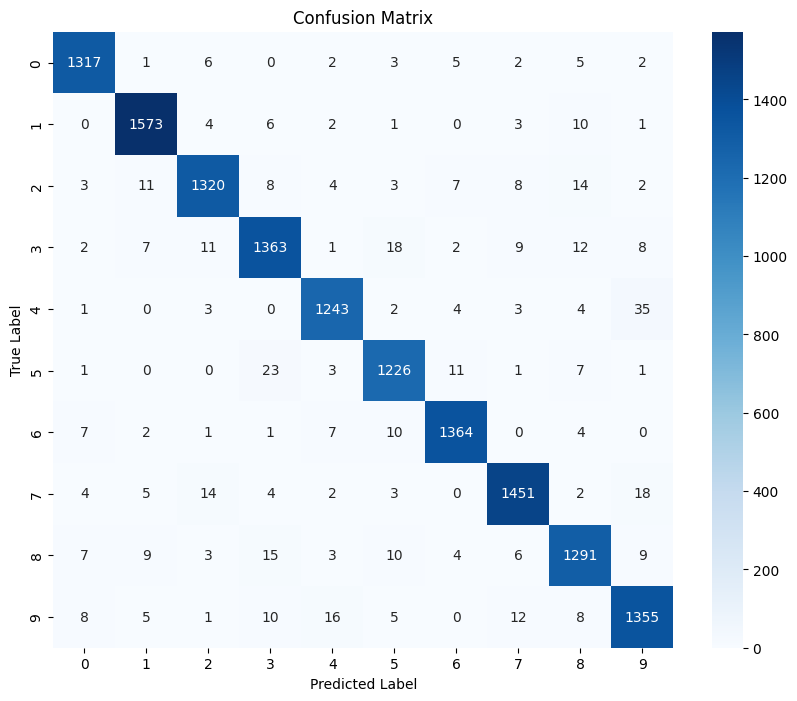

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Normalize pixel values
X = X / 255.0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple neural network
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Visualize input space
def plot_digits(images, targets):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, (image, label) in enumerate(zip(images, targets)):
        axes[i//5, i%5].imshow(image.reshape(28, 28), cmap='gray')
        axes[i//5, i%5].set_title(f'Digit: {label}')
        axes[i//5, i%5].axis('off')
    plt.tight_layout()
    plt.show()

# Visualize output space (confusion matrix)
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage
plot_digits(X_test[:10], y_test[:10])
plot_confusion_matrix(y_test, y_pred)

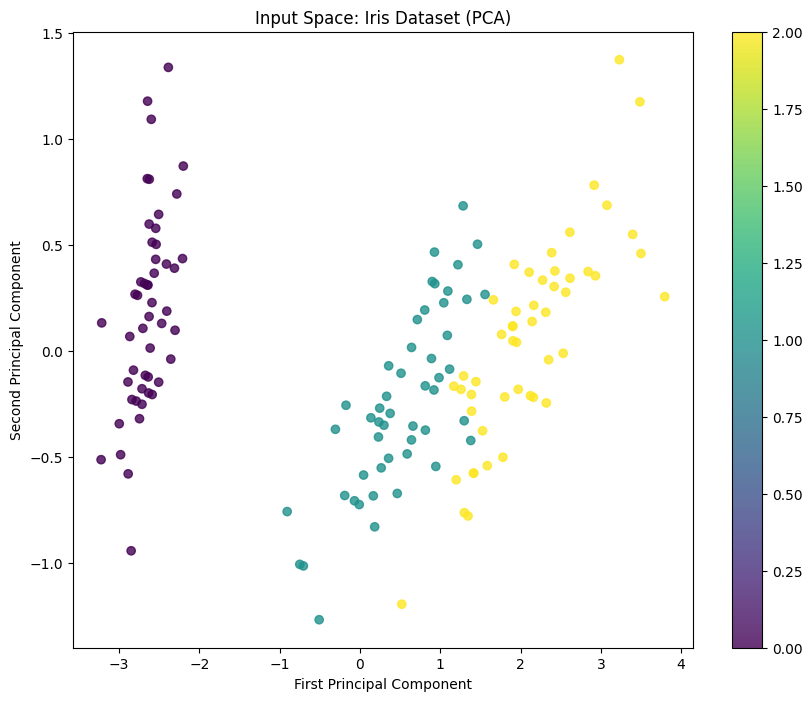

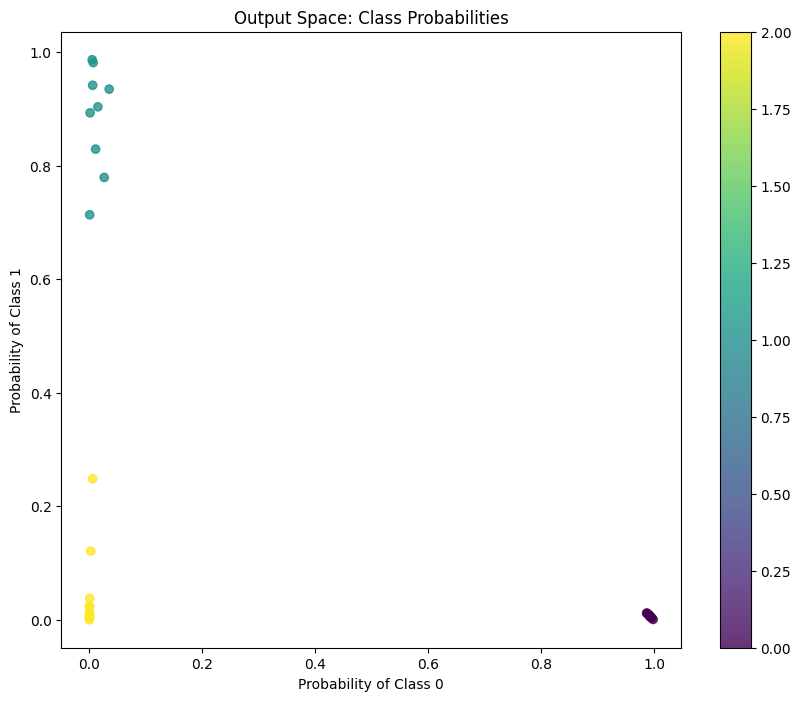

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple neural network
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Get model predictions and probabilities
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)

# Visualize input space
def plot_input_space(X, y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
    plt.colorbar(scatter)
    plt.title('Input Space: Iris Dataset (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Visualize output space
def plot_output_space(y_proba, y_true):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(y_proba[:, 0], y_proba[:, 1], c=y_true, cmap='viridis', alpha=0.8)
    plt.colorbar(scatter)
    plt.title('Output Space: Class Probabilities')
    plt.xlabel('Probability of Class 0')
    plt.ylabel('Probability of Class 1')
    plt.show()

# Plot input and output spaces
plot_input_space(X, y)
plot_output_space(y_proba, y_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

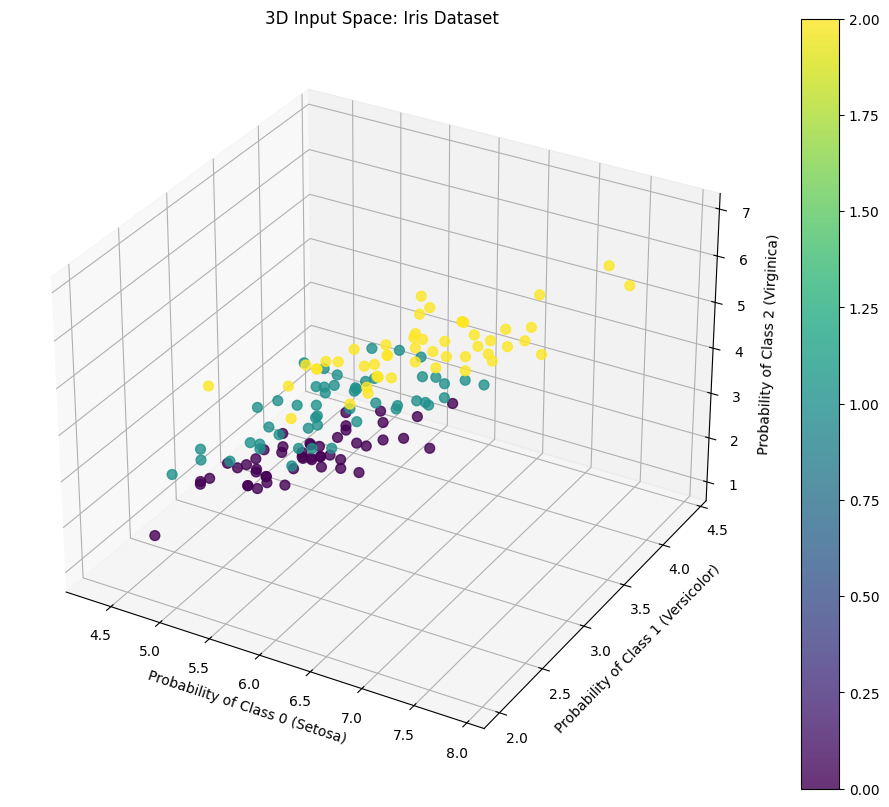

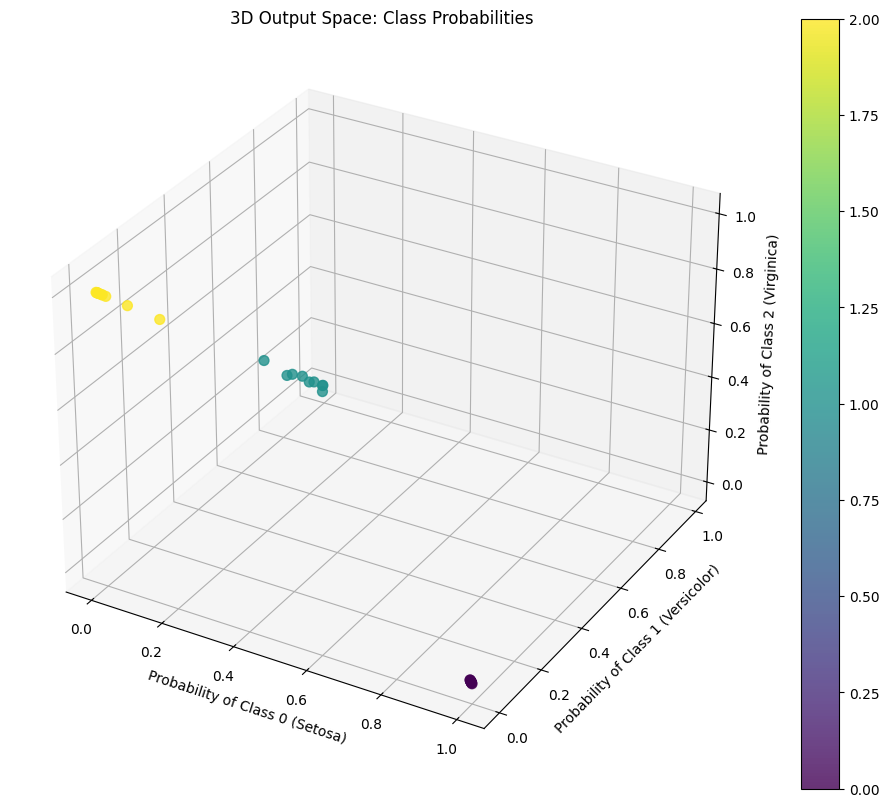

Example output probabilities:
Sample 1: [0.00569337 0.94147974 0.05282689], True class: versicolor
Sample 2: [0.99286328 0.00553323 0.0016035 ], True class: setosa
Sample 3: [4.65803588e-08 1.60763116e-04 9.99839190e-01], True class: virginica
Sample 4: [0.01090654 0.82913672 0.15995674], True class: versicolor
Sample 5: [0.00109181 0.89290544 0.10600275], True class: versicolor


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load and prepare the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Get model predictions and probabilities
y_proba = clf.predict_proba(X_test_scaled)

# Visualize output space
def plot_output_space(y_proba, y_true, if_input_space=False):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(y_proba[:, 0], y_proba[:, 1], y_proba[:, 2], 
                         c=y_true, cmap='viridis', s=50, alpha=0.8)
    
    ax.set_xlabel('Probability of Class 0 (Setosa)')
    ax.set_ylabel('Probability of Class 1 (Versicolor)')
    ax.set_zlabel('Probability of Class 2 (Virginica)')

    if if_input_space:
        ax.set_title('3D Input Space: Iris Dataset')
    else:
        ax.set_title('3D Output Space: Class Probabilities')
    
    plt.colorbar(scatter)
    plt.show()

# Plot input space 
plot_output_space(X, y, True)

# Plot output space
plot_output_space(y_proba, y_test)

# Print some example probabilities
print("Example output probabilities:")
for i in range(5):
    print(f"Sample {i+1}: {y_proba[i]}, True class: {iris.target_names[y_test[i]]}")

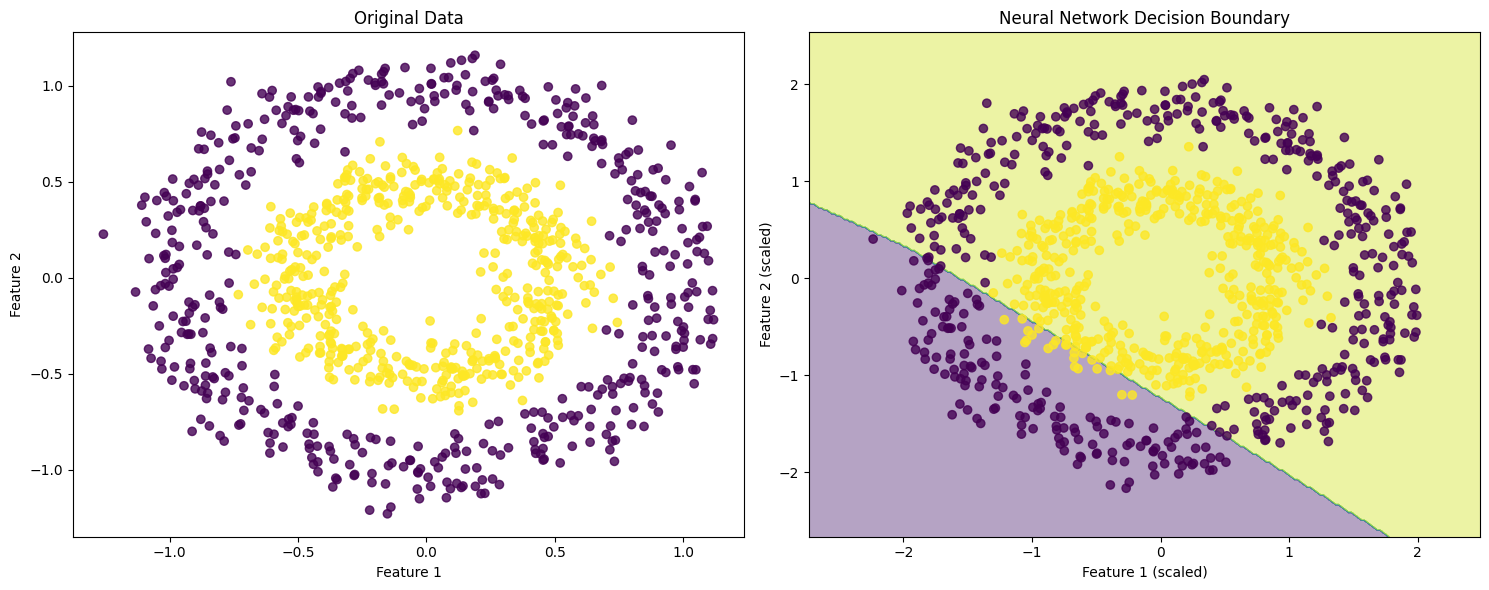

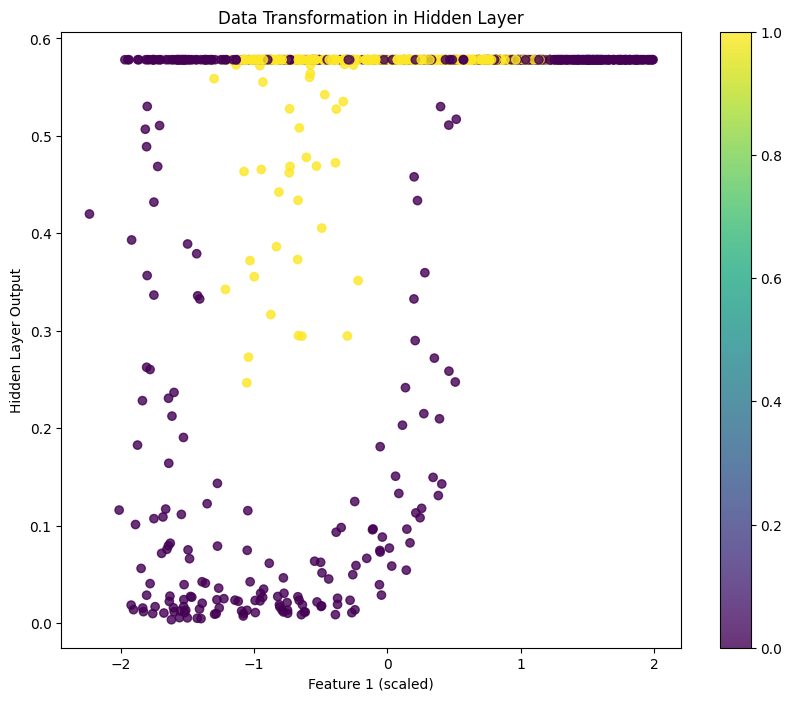

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Generate concentric circles data
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train a neural network
nn = MLPClassifier(hidden_layer_sizes=(4, 2), activation='relu', max_iter=1000, random_state=42)
nn.fit(X_scaled, y)

# Function to visualize decision boundary
def plot_decision_boundary(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

# Visualize original data and decision boundary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8)
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

plot_decision_boundary(X_scaled, y, nn, ax2)
ax2.set_title('Neural Network Decision Boundary')
ax2.set_xlabel('Feature 1 (scaled)')
ax2.set_ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()

# Visualize the transformation in the first hidden layer
hidden_layer_output = nn.predict_proba(X_scaled)[:, 1].reshape(-1, 1)
transformed_X = np.hstack([X_scaled, hidden_layer_output])

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(transformed_X[:, 0], transformed_X[:, 2], c=y, cmap='viridis', alpha=0.8)
ax.set_title('Data Transformation in Hidden Layer')
ax.set_xlabel('Feature 1 (scaled)')
ax.set_ylabel('Hidden Layer Output')
plt.colorbar(scatter)
plt.show()

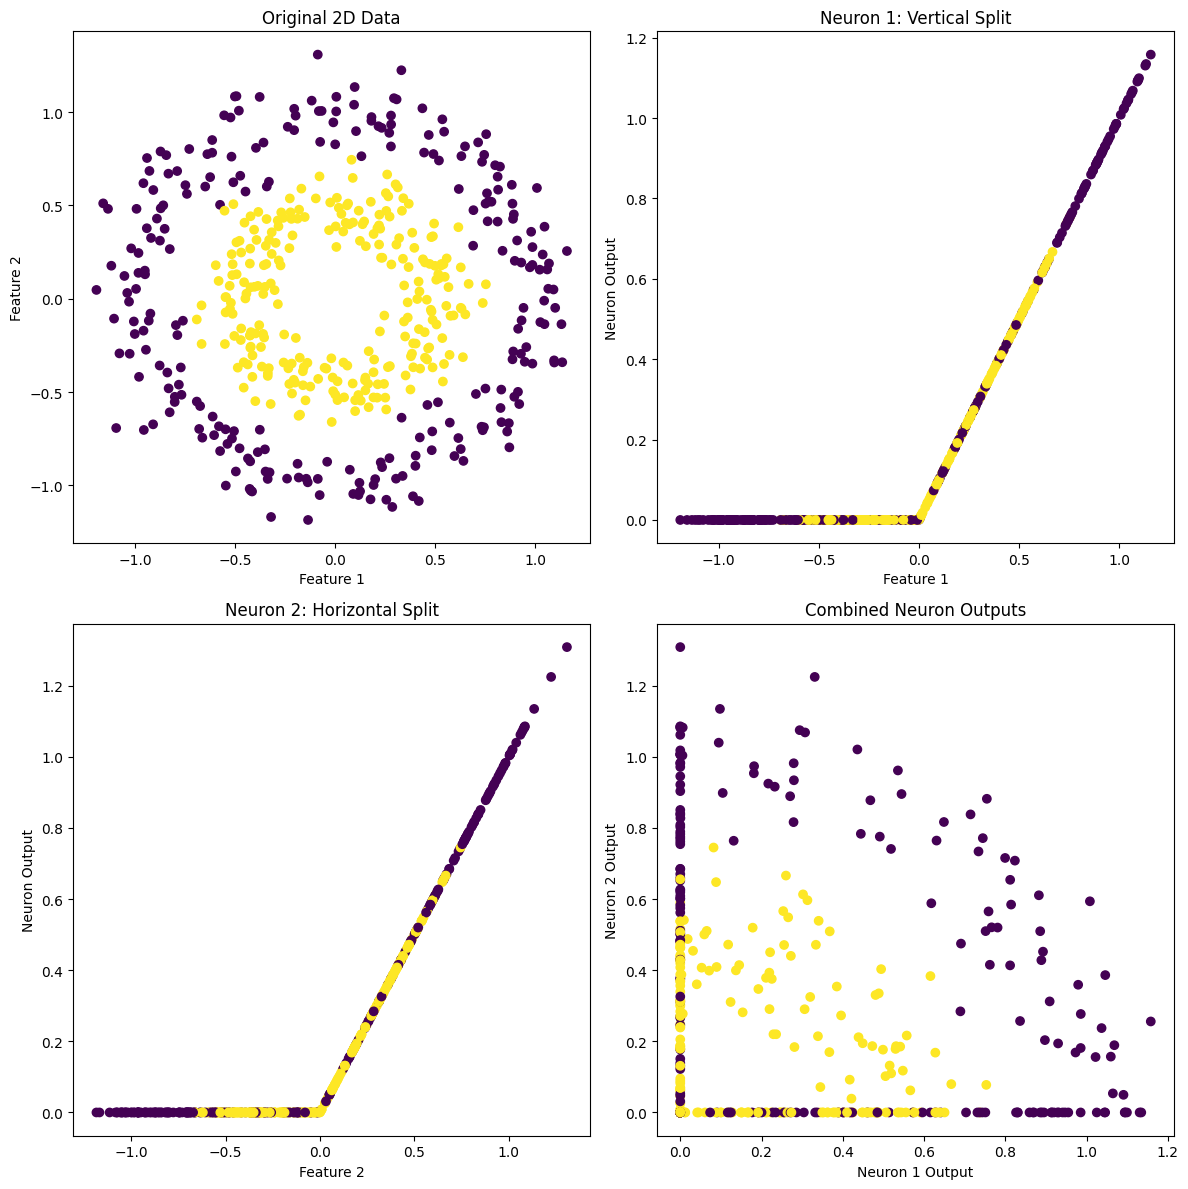

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate simple concentric circles data
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Define a simple neuron function
def neuron(X, w1, w2, b):
    return np.maximum(0, w1 * X[:, 0] + w2 * X[:, 1] + b)  # ReLU activation

# Create plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original data
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0, 0].set_title('Original 2D Data')
axs[0, 0].set_xlabel('Feature 1')
axs[0, 0].set_ylabel('Feature 2')

# Neuron 1: Vertical split
output1 = neuron(X, 1, 0, 0)
axs[0, 1].scatter(X[:, 0], output1, c=y, cmap='viridis')
axs[0, 1].set_title('Neuron 1: Vertical Split')
axs[0, 1].set_xlabel('Feature 1')
axs[0, 1].set_ylabel('Neuron Output')

# Neuron 2: Horizontal split
output2 = neuron(X, 0, 1, 0)
axs[1, 0].scatter(X[:, 1], output2, c=y, cmap='viridis')
axs[1, 0].set_title('Neuron 2: Horizontal Split')
axs[1, 0].set_xlabel('Feature 2')
axs[1, 0].set_ylabel('Neuron Output')

# Combined output
axs[1, 1].scatter(output1, output2, c=y, cmap='viridis')
axs[1, 1].set_title('Combined Neuron Outputs')
axs[1, 1].set_xlabel('Neuron 1 Output')
axs[1, 1].set_ylabel('Neuron 2 Output')

plt.tight_layout()
plt.show()

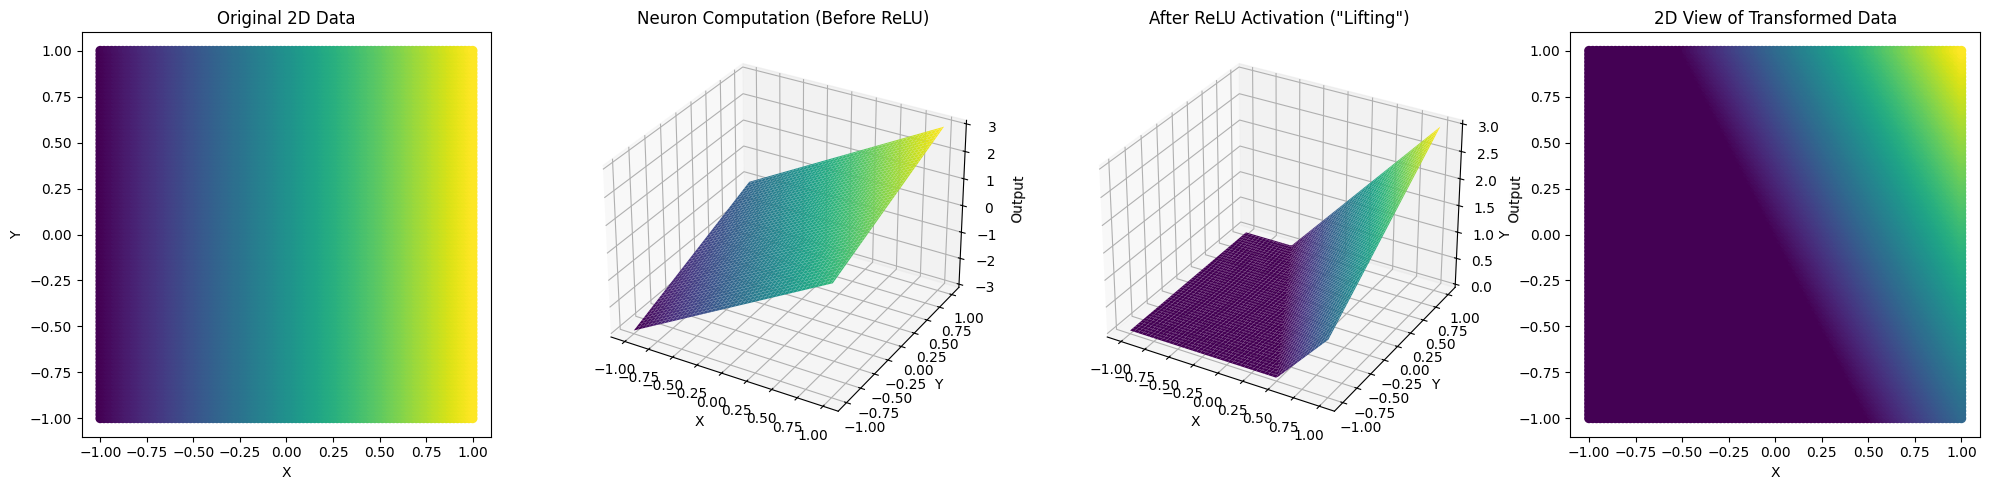

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Define a simple neuron function (ReLU activation)
def neuron(x, y, w1, w2, b):
    return np.maximum(0, w1*x + w2*y + b)

# Create the plot
fig = plt.figure(figsize=(20, 5))

# Original 2D data
ax1 = fig.add_subplot(141)
ax1.scatter(X, Y, c=X, cmap='viridis')
ax1.set_title('Original 2D Data')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Neuron computation (before ReLU)
ax2 = fig.add_subplot(142, projection='3d')
Z = 2*X + Y  # w1=2, w2=1, b=0
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title('Neuron Computation (Before ReLU)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Output')

# After ReLU activation
ax3 = fig.add_subplot(143, projection='3d')
Z_relu = neuron(X, Y, 2, 1, 0)
ax3.plot_surface(X, Y, Z_relu, cmap='viridis')
ax3.set_title('After ReLU Activation ("Lifting")')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Output')

# 2D view of the transformed data
ax4 = fig.add_subplot(144)
ax4.scatter(X, Y, c=Z_relu, cmap='viridis')
ax4.set_title('2D View of Transformed Data')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')

plt.tight_layout()
plt.show()

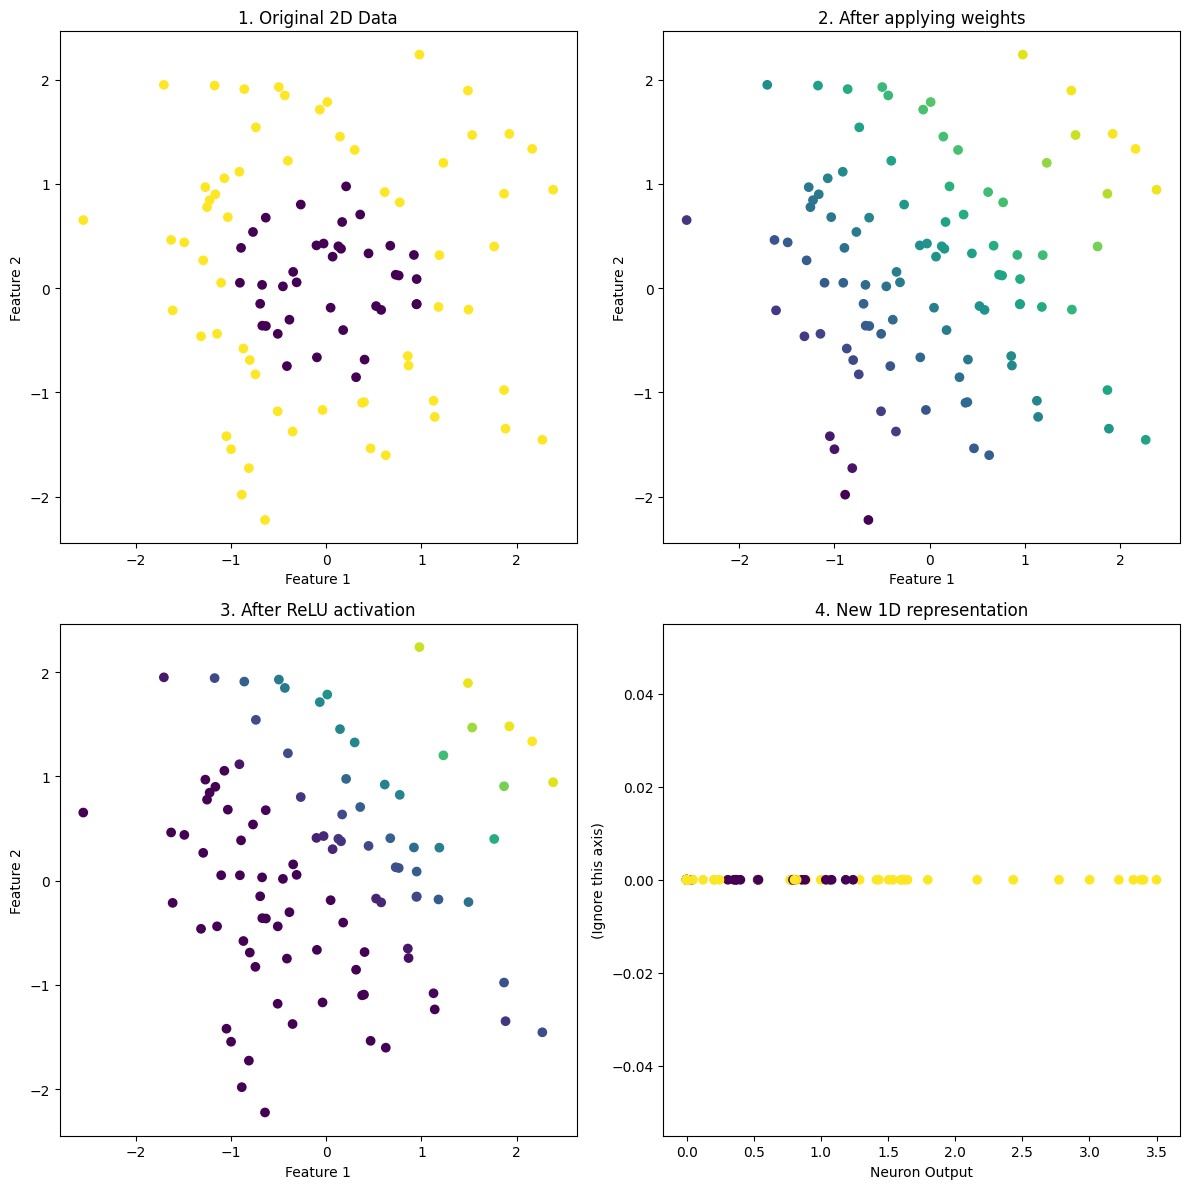

Sample points:
Original: (1.76, 0.40), Class: 1
Transformed: 2.16

Original: (0.98, 2.24), Class: 1
Transformed: 3.22

Original: (1.87, -0.98), Class: 1
Transformed: 0.89

Original: (0.95, -0.15), Class: 0
Transformed: 0.80

Original: (-0.10, 0.41), Class: 0
Transformed: 0.31



In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate simple data
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] ** 2 + X[:, 1] ** 2 > 1).astype(int)

# Define a simple neuron function
def neuron(X, w1, w2, b):
    return np.maximum(0, w1 * X[:, 0] + w2 * X[:, 1] + b)

# Create plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original data
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0, 0].set_title('1. Original 2D Data')
axs[0, 0].set_xlabel('Feature 1')
axs[0, 0].set_ylabel('Feature 2')

# Step 2: Apply weights
weighted_sum = 1 * X[:, 0] + 1 * X[:, 1] + 0  # w1=1, w2=1, b=0
axs[0, 1].scatter(X[:, 0], X[:, 1], c=weighted_sum, cmap='viridis')
axs[0, 1].set_title('2. After applying weights')
axs[0, 1].set_xlabel('Feature 1')
axs[0, 1].set_ylabel('Feature 2')

# Step 3: Apply ReLU
relu_output = np.maximum(0, weighted_sum)
axs[1, 0].scatter(X[:, 0], X[:, 1], c=relu_output, cmap='viridis')
axs[1, 0].set_title('3. After ReLU activation')
axs[1, 0].set_xlabel('Feature 1')
axs[1, 0].set_ylabel('Feature 2')

# Step 4: New representation
axs[1, 1].scatter(relu_output, np.zeros_like(relu_output), c=y, cmap='viridis')
axs[1, 1].set_title('4. New 1D representation')
axs[1, 1].set_xlabel('Neuron Output')
axs[1, 1].set_ylabel('(Ignore this axis)')

plt.tight_layout()
plt.show()

# Print some sample points
print("Sample points:")
for i in range(5):
    print(f"Original: ({X[i, 0]:.2f}, {X[i, 1]:.2f}), Class: {y[i]}")
    print(f"Transformed: {relu_output[i]:.2f}")
    print()